In [1]:
from tensorly.metrics.regression import RMSE
from tensorly.decomposition import parafac
import time
import scipy.io
import tensorly as tl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorly.cp_tensor import CPTensor
from parafac_normalization_comparison import *

np.set_printoptions(precision=3)

#tensor
array = np.random.randn(30, 40, 20)
tensor = tl.tensor(array,dtype='float32')
tensor2 = tl.tensor(1e8*array,dtype='float32')


#parameters
init='svd'
svd='numpy_svd'
rank=5

normalization_functions=[parafac_normalize_1, parafac_normalize_2, parafac_normalize_3, 
                         parafac_normalize_4, parafac_normalize_5]
time_cp = tl.zeros([5, 20, 2])
errors1 = []
weights1 = []
errors2 = []
weights2 = []
rec_errors = tl.zeros([5, 20, 2])

1. Normalization at each outer loop (PR)
2. Normalization at each inner loop iteration (last factor is normalized after error calculation)
3. Normalization at the very end
4. 2 and 3 together
5. Current tensorly normalization 

# Experiments

In [2]:
for j in range(20):
  for i in range(5):
     tic = time.time()
     tensornorm, errorsnorm, weights_iter = normalization_functions[i](tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
     weightsnorm, factorsnorm = tensornorm
     cp_reconstructionnorm = tl.cp_to_tensor((weightsnorm, factorsnorm))
     time_cp[i, j, 0] = time.time()-tic
     rec_errors[i, j, 0] = RMSE(tensor,cp_reconstructionnorm)
     
     if j==19:
        weights1.append(weights_iter)
        errors1.append(errorsnorm)

     tic = time.time()
     tensornorm, errorsnorm, weights_iter = normalization_functions[i](tensor2, rank=rank, init=init, normalize_factors=True, return_errors=True)
     weightsnorm, factorsnorm = tensornorm
     cp_reconstructionnorm = tl.cp_to_tensor((weightsnorm, factorsnorm))
     time_cp[i, j, 1] = time.time()-tic
     rec_errors[i, j, 1] = RMSE(tensor,cp_reconstructionnorm)
    
     if j==19:
        weights2.append(weights_iter)
        errors2.append(errorsnorm)

# Error per iteration 

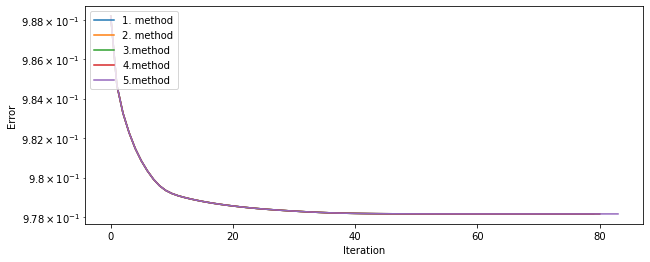

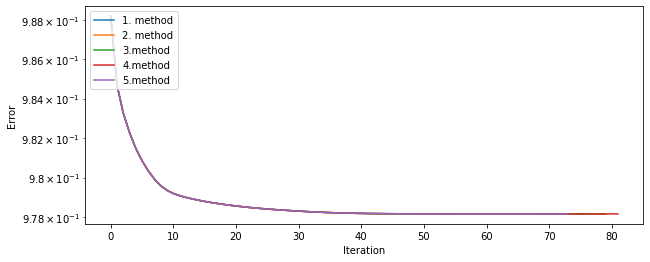

In [3]:
each_iteration(errors1[0], errors1[1], errors1[2], errors1[3], errors1[4])
each_iteration(errors2[0], errors2[1], errors2[2], errors2[3], errors2[4])

# Plotting weights per iteration for each method

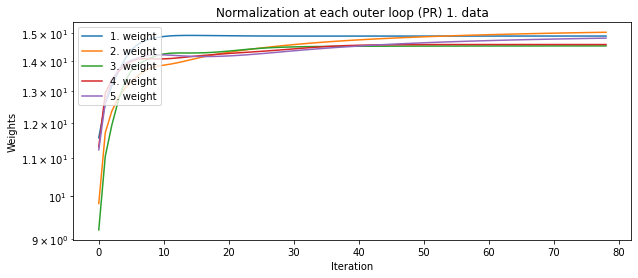

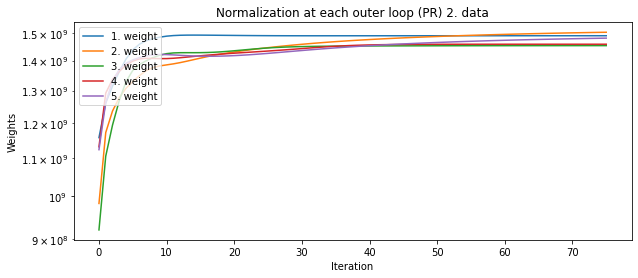

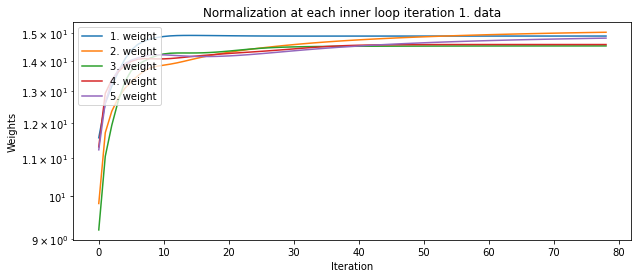

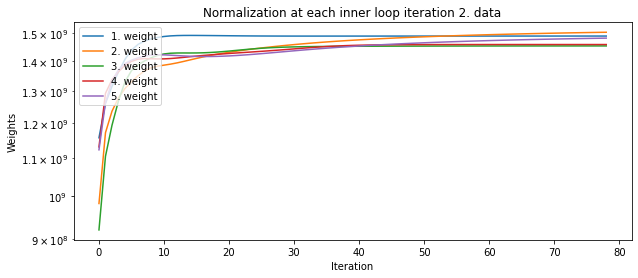

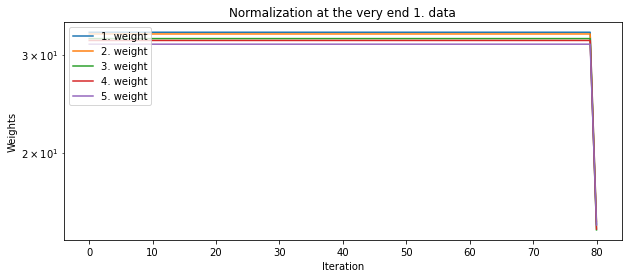

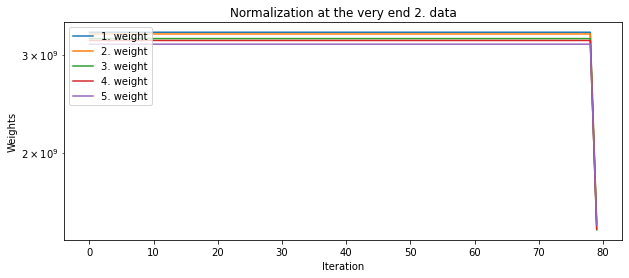

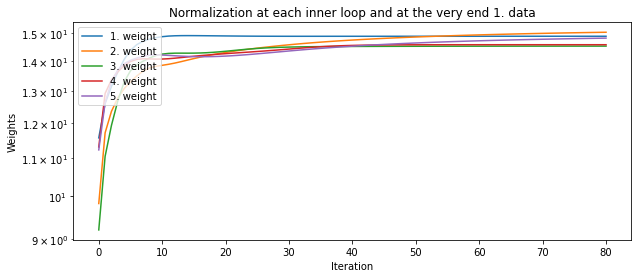

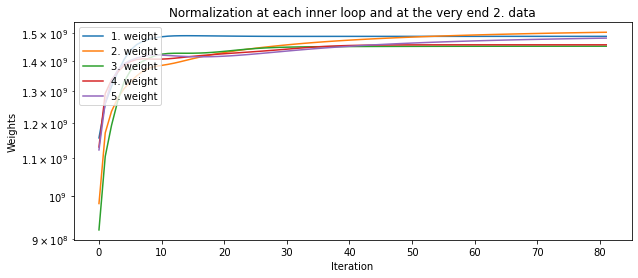

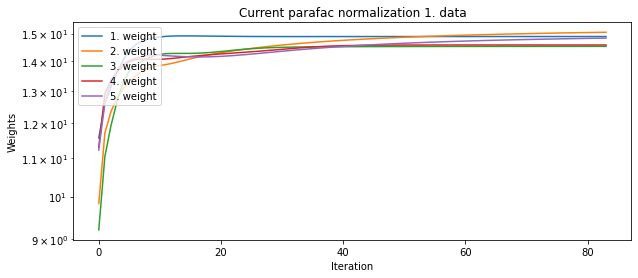

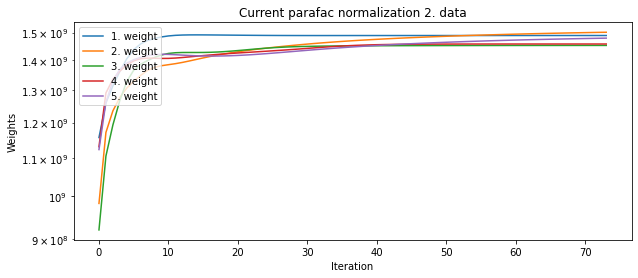

In [4]:
plot_weights(weights1[0], "Normalization at each outer loop (PR) 1. data")
plot_weights(weights2[0], "Normalization at each outer loop (PR) 2. data")
plot_weights(weights1[1], "Normalization at each inner loop iteration 1. data")
plot_weights(weights2[1], "Normalization at each inner loop iteration 2. data")
plot_weights(weights1[2], "Normalization at the very end 1. data")
plot_weights(weights2[2], "Normalization at the very end 2. data")
plot_weights(weights1[3], "Normalization at each inner loop and at the very end 1. data")
plot_weights(weights2[3], "Normalization at each inner loop and at the very end 2. data")
plot_weights(weights1[4], "Current parafac normalization 1. data")
plot_weights(weights2[4], "Current parafac normalization 2. data")

# Last weights

In [5]:
print("1. Data;")
print("1. Method:"+ str(weights1[0][-1]))
print("2. Method:"+ str(weights1[1][-1]))
print("3. Method:"+ str(weights1[2][-1]))
print("4. Method:"+ str(weights1[3][-1]))
print("5. Method:"+ str(weights1[4][-1]))
print("2. Data;")
print("1. Method:"+ str(weights2[0][-1]))
print("2. Method:"+ str(weights2[1][-1]))
print("3. Method:"+ str(weights2[2][-1]))
print("4. Method:"+ str(weights2[3][-1]))
print("5. Method:"+ str(weights2[4][-1]))

1. Data;
1. Method:[14.892 15.034 14.531 14.582 14.816]
2. Method:[14.892 15.034 14.531 14.582 14.816]
3. Method:[14.892 15.041 14.531 14.582 14.823]
4. Method:[14.892 15.041 14.531 14.582 14.823]
5. Method:[14.892 15.052 14.532 14.582 14.833]
2. Data;
1. Method:[1.489e+09 1.502e+09 1.453e+09 1.458e+09 1.480e+09]
2. Method:[1.489e+09 1.503e+09 1.453e+09 1.458e+09 1.482e+09]
3. Method:[1.489e+09 1.504e+09 1.453e+09 1.458e+09 1.482e+09]
4. Method:[1.489e+09 1.504e+09 1.453e+09 1.458e+09 1.483e+09]
5. Method:[1.489e+09 1.501e+09 1.453e+09 1.458e+09 1.480e+09]


# Mean and standard deviation of reconstruction error

In [6]:
print("1. Data;")
print("1. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[0, :, 0]))+ ' ' + str("%.3f" % np.std(rec_errors[0, :, 0])))
print("2. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[1, :, 0]))+ ' ' + str("%.3f" % np.std(rec_errors[1, :, 0])))                     
print("3. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[2, :, 0]))+ ' ' + str("%.3f" % np.std(rec_errors[2, :, 0])))                     
print("4. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[3, :, 0]))+ ' ' + str("%.3f" % np.std(rec_errors[3, :, 0])))                     
print("5. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[4, :, 0]))+ ' ' + str("%.3f" % np.std(rec_errors[4, :, 0])))                     
print("2. Data;")
print("1. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[0, :, 1]))+ ' ' + str("%.3f" % np.std(rec_errors[0, :, 1])))                     
print("2. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[1, :, 1]))+ ' ' + str("%.3f" % np.std(rec_errors[1, :, 1])))                     
print("3. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[2, :, 1]))+ ' ' + str("%.3f" % np.std(rec_errors[2, :, 1])))                     
print("4. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[3, :, 1]))+ ' ' + str("%.3f" % np.std(rec_errors[3, :, 1])))                     
print("5. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[4, :, 1]))+ ' ' + str("%.3f" % np.std(rec_errors[4, :, 1])))                     

1. Data;
1. Method: 0.981 0.000
2. Method: 0.981 0.000
3. Method: 0.981 0.000
4. Method: 0.981 0.000
5. Method: 0.981 0.000
2. Data;
1. Method: 20842214.900 11.924
2. Method: 20842220.000 8.899
3. Method: 20842217.100 8.590
4. Method: 20842221.800 10.524
5. Method: 20842214.100 12.782


# Mean and standard deviation of processing time

In [7]:
print("1. Data;")
print("1. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[0, :, 0]))+ ' ' + str("%.3f" % np.std(time_cp[0, :, 0])))
print("2. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[1, :, 0]))+ ' ' + str("%.3f" % np.std(time_cp[1, :, 0])))                     
print("3. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[2, :, 0]))+ ' ' + str("%.3f" % np.std(time_cp[2, :, 0])))                     
print("4. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[3, :, 0]))+ ' ' + str("%.3f" % np.std(time_cp[3, :, 0])))                     
print("5. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[4, :, 0]))+ ' ' + str("%.3f" % np.std(time_cp[4, :, 0])))                     
print("2. Data;")
print("1. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[0, :, 1]))+ ' ' + str("%.3f" % np.std(time_cp[0, :, 1])))                     
print("2. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[1, :, 1]))+ ' ' + str("%.3f" % np.std(time_cp[1, :, 1])))                     
print("3. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[2, :, 1]))+ ' ' + str("%.3f" % np.std(time_cp[2, :, 1])))                     
print("4. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[3, :, 1]))+ ' ' + str("%.3f" % np.std(time_cp[3, :, 1])))                     
print("5. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[4, :, 1]))+ ' ' + str("%.3f" % np.std(time_cp[4, :, 1])))  

1. Data;
1. Method: 0.264 0.126
2. Method: 0.225 0.084
3. Method: 0.209 0.134
4. Method: 0.250 0.081
5. Method: 0.225 0.085
2. Data;
1. Method: 0.217 0.105
2. Method: 0.247 0.123
3. Method: 0.195 0.106
4. Method: 0.252 0.079
5. Method: 0.226 0.099
